In [1]:
#Project
#imports
import pandas as pd
import numpy as np
import seaborn as sea
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.options.display.max_rows = None
pd.options.display.max_columns = None
#goal 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
rice = pd.read_csv(r"C:\Users\Jacob\Desktop\Data_Analytics\Project\global-food.csv")
gdp = pd.read_csv("C:/Users/Jacob/Desktop/Data_Analytics/Project/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5358352/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_5358352.csv")
cpi = pd.read_csv(r"C:\Users\Jacob\Desktop\Data_Analytics\API_IQ.CPA.TRAN.XQ_DS2_en_csv_v2_5358377\API_IQ.CPA.TRAN.XQ_DS2_en_csv_v2_5358377.csv")

In [3]:
cpi.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.805556,2.750000,2.722222,2.694444,2.611111,2.555556,2.611111,2.578947,2.526316,2.555556,2.5,2.50,2.421053,2.5,2.500,2.500,2.473684
2,Afghanistan,AFG,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.00,2.000000,2.0,2.000,2.000,NaN
3,Africa Western and Central,AFW,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.789474,2.789474,2.815789,2.789474,2.825000,2.850000,2.925000,2.825000,2.875000,2.900000,2.9,2.85,2.875000,2.9,2.925,2.925,2.900000
4,Angola,AGO,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cpi.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.000000,120.000000,117.000000,117.000000,119.000000,119.000000,120.000000,122.000000,123.000000,117.000000,117.000000,114.000000,115.000000,114.000000,116.000000,113.000000,112.000000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.904829,2.888516,2.898333,2.886243,2.892051,2.867271,2.935337,2.916558,2.925116,2.916127,2.882601,2.862911,2.832058,2.846991,2.851790,2.870275,2.886279
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.542111,0.560107,0.570575,0.568096,0.574168,0.576190,0.561648,0.600368,0.601160,0.577741,0.599289,0.595267,0.626681,0.613154,0.614950,0.626748,0.670075
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000,1.000000,1.000000,1.000000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000,2.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.931481,2.882622,2.954545,3.000000,3.000000,2.982759,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.916667,2.872535,2.936184,3.000000,3.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.092857,3.012500,3.045455,3.000000,3.018055,3.000000,3.314286,3.388889,3.443750,3.133333,3.133333,3.133929,3.107143,3.035714,3.055357,3.266667,3.354167
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000,4.500000


In [5]:
cpi.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
261,Kosovo,XKX,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.5
262,"Yemen, Rep.",YEM,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,2.5,2.5,2.0,2.0,2.0,1.5,1.5,1.5,1.5,1.5,1.5,1.5
263,South Africa,ZAF,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Zambia,ZMB,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,3.0,3.0,3.0,2.5,2.5,3.0,3.0,3.0,3.0,3.0,3.0,2.5,2.5,2.5,2.5
265,Zimbabwe,ZWE,"CPIA transparency, accountability, and corrupt...",IQ.CPA.TRAN.XQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5,1.0,1.0,1.0,1.5,1.5,1.5,1.5,1.5,1.5,2.0,2.0,2.0,2.5,2.5,2.5,2.5


In [6]:
cpi = cpi.drop('Country Code', axis=1)
cpi = cpi.drop('Indicator Name', axis=1)
cpi = cpi.drop('Indicator Code', axis=1)

In [7]:
cpi = pd.melt(cpi, id_vars=['Country Name'], var_name='year', value_name='Corruption')
cpi.head()

,Country Name,year,Corruption
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,NaN
2,Afghanistan,1960,NaN
3,Africa Western and Central,1960,NaN
4,Angola,1960,NaN


In [8]:
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,3.224054e+10,3.351603e+10,3.652309e+10,4.183018e+10,4.486458e+10,4.948110e+10,5.351720e+10,6.960386e+10,8.606157e+10,9.165319e+10,9.112857e+10,1.034200e+11,1.153500e+11,1.346770e+11,1.706620e+11,1.743950e+11,1.672740e+11,1.749260e+11,1.601410e+11,1.363030e+11,1.525250e+11,1.861530e+11,2.041490e+11,2.175480e+11,2.532350e+11,2.734150e+11,2.382660e+11,2.365370e+11,2.401310e+11,2.696490e+11,2.684260e+11,2.821970e+11,2.658260e+11,2.621840e+11,2.839380e+11,2.588300e+11,2.648810e+11,3.526740e+11,4.388530e+11,5.122340e+11,5.757220e+11,6.608270e+11,7.081190e+11,7.190950e+11,8.603610e+11,9.642130e+11,9.720020e+11,9.826770e+11,1.003400e+12,9.231440e+11,8.898590e+11,1.030480e+12,1.016700e+12,1.009050e+12,9.341790e+11,1.089450e+12
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,6.971379e+09,9.715762e+09,1.024977e+10,1.215484e+10,1.563386e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,2.350461e+10,2.083282e+10,2.526495e+10,3.127382e+10,4.421448e+10,5.144473e+10,6.212939e+10,6.531501e+10,7.119971e+10,8.862840e+10,1.120310e+11,2.110030e+11,1.871640e+11,1.381150e+11,1.142630e+11,1.165070e+11,1.074980e+11,1.103220e+11,1.089430e+11,1.017690e+11,1.218020e+11,1.174570e+11,1.182820e+11,9.882637e+10,8.628174e+10,1.082210e+11,1.257630e+11,1.270640e+11,1.301070e+11,1.375210e+11,1.404100e+11,1.467800e+11,1.766060e+11,2.044710e+11,2.534720e+11,3.100940e+11,3.956560e+11,4.644260e+11,5.664790e+11,5.070300e+11,5.971290e+11,6.804560e+11,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169953e+10,1.094370e+11,1.249980e+11,1.334020e+11,1.372440e+11,8.721930e+10,

In [9]:
gdp.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.181777e+09,5.015895e+09,5.344014e+09,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.412034e+09
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.647119e+09,5.930370e+09,6.463650e+09,5.368271e+09,4.167356e+09,4.258789e+09,5.785685e+09,6.838557e+09,6.325142e+09,7.641103e+09,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540132e+10,4.041523e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,1.712479e+10,1.925699e+10,2.121839e+10,2.341108e+10,2.451591e+10,3.326277e+10,4.138919e+10,4.290692e+10,4.115045e+10,4.532840e+10,5.160740e+10,6.303869e+10,8.941189e+10,9.314148e+10,8.590407e+10,9.620411e+10,8.487013e+10,6.445938e+10,7.335478e+10,9.653575e+10,1.039770e+11,1.080560e+11,1.260480e+11,1.352040e+11,1.469570e+11,1.471970e+11,1.535130e+11,1.717350e+11,1.632370e+11,1.689770e+11,1.529830e+11,1.515170e+11,1.517530e+11,1.354300e+11,1.290880e+11,1.970200e+11,2.558070e+11,2.888680e+11,3.038610e+11,3.330750e+11,3.161320e+11,3.297530e+11,4.173650e+11,4.582020e+11,4.344010e+11,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.041600e+11,3.885320e+11,3.376200e+11,4.190150e+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,1.264286e+09,1.368000e+09,1.605857e+09,1.965714e+09,1.825286e+09,1.687000e+09,1.910714e+09,2.268714e+09,3.121833e+09,2.618667e+09,2.746714e+09,2.483000e+09,2.813375e+09,3.325500e+09,3.829500e+09,3.872667e+09,3.994778e+09,3.216308e+09,2.739444e+09,2.281258e+09,1.661949e+09,2.269895e+09,3.713614e+09,3.998638e+09,3.285217e+09,3.378882e+09,3.181922e+09,3.273238e+09,3.656648e+09,3.807067e+09,3.597221e+09,4.303282e+09,3.537683e+09,3.404312e+09,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,1.791086e+10,1.532834e+10,2.026556e+10,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.214763e+10
265,Zimbabwe,ZWE,GDP (current US$),NY.GDP.MKTP.CD,1.052990e+09,1.096647e+09,1.117602e+09,1.159512e+09,1.217138e+09,1.311436e+09,1.281750e+09,1.397002e+09,1.479600e+09,1.747999e+09,1.884206e+09,2.178716e+09,2.677729e+09,3.309354e+09,3.982161e+09,4.371301e+09,4.318372e+09,4.364382e+09,4.351600e+09,5.177459e+09,6.678868e+09,8.011374e+09,8.539701e+09,7.764067e+09,6.352126e+09,5.637259e+09,6.217524e+09,6.741215e+09,7.814784e+09,8.286323e+09,8.783817e+09,8.641482e+09,6.751472e+09,6.563813e+09,6.890675e+09,7.111271e+09,8.553147e+09,8.529572e+09,6.401968e+09,6.858013e+09,6.689958e+09,6.777385e+09,6.342116e+09,5.727592e+09,5.805598e+09,5.755215e+09,5.443896e+09,5.291950e+09,4.415703e+09,9.665793e+09,1.204166e+10,1.410192e+10,1.711485e+10,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,1.758489e+10,3.415607e+10,2.183223e+10,2.150970e+10,2.837124e+10


In [10]:
gdp.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,1.340000e+02,1.360000e+02,1.380000e+02,1.380000e+02,1.380000e+02,1.490000e+02,1.520000e+02,1.550000e+02,1.600000e+02,1.600000e+02,1.690000e+02,1.720000e+02,1.720000e+02,1.720000e+02,1.730000e+02,1.750000e+02,1.760000e+02,1.790000e+02,1.780000e+02,1.790000e+02,1.910000e+02,1.940000e+02,1.950000e+02,1.960000e+02,1.970000e+02,1.990000e+02,2.010000e+02,2.050000e+02,2.100000e+02,2.100000e+02,2.260000e+02,2.260000e+02,2.270000e+02,2.290000e+02,2.310000e+02,2.400000e+02,2.400000e+02,2.400000e+02,2.420000e+02,2.430000e+02,2.470000e+02,2.490000e+02,2.540000e+02,2.540000e+02,2.540000e+02,2.540000e+02,2.550000e+02,2.550000e+02,2.560000e+02,2.560000e+02,2.570000e+02,2.600000e+02,2.580000e+02,2.590000e+02,2.600000e+02,2.580000e+02,2.570000e+02,2.570000e+02,2.570000e+02,2.550000e+02,2.520000e+02,2.450000e+02
mean,7.103307e+10,7.186605e+10,7.549844e+10,8.144482e+10,8.941396e+10,9.084577e+10,1.010890e+11,1.048751e+11,1.100031e+11,1.216457e+11,1.316920e+11,1.426569e+11,1.643203e+11,2.027595e+11,2.358723e+11,2.602840e+11,2.800887e+11,3.111675e+11,3.646655e+11,4.244623e+11,4.536754e+11,4.638188e+11,4.548927e+11,4.546589e+11,4.642982e+11,4.802081e+11,5.560581e+11,6.163105e+11,6.786841e+11,7.068786e+11,7.520842e+11,7.752075e+11,8.227464e+11,8.273304e+11,8.844757e+11,9.527387e+11,9.816931e+11,9.806253e+11,9.697199e+11,9.924946e+11,1.009131e+12,9.981704e+11,1.017707e+12,1.148382e+12,1.305610e+12,1.430352e+12,1.564642e+12,1.792816e+12,1.995252e+12,1.894015e+12,2.095327e+12,2.321140e+12,2.401034e+12,2.477219e+12,2.538873e+12,2.400201e+12,2.444669e+12,2.619921e+12,2.783540e+12,2.845284e+12,2.790295e+12,3.276616e+12
std,2.132399e+11,2.208574e+11,2.354227e+11,2.532710e+11,2.769942e+11,2.909743e+11,3.185995e+11,3.369850e+11,3.589006e+11,3.950249e+11,4.223836e+11,4.634815e+11,5.354204e+11,6.505089e+11,7.372827e+11,8.198846e+11,8.865079e+11,9.940819e+11,1.182407e+12,1.368609e+12,1.487740e+12,1.507155e+12,1.488898e+12,1.522742e+12,1.580346e+12,1.652799e+12,1.968183e+12,2.240390e+12,2.480995e+12,2.590850e+12,2.826870e+12,2.967320e+12,3.178069e+12,3.195568e+12,3.425351e+12,3.738255e+12,3.794052e+12,3.750368e+12,3.749070e+12,3.899102e+12,3.966468e+12,3.927118e+12,4.053223e+12,4.547898e+12,5.096226e+12,5.455502e+12,5.840962e+12,6.527528e+12,7.098048e+12,6.707802e+12,7.253006e+12,7.979973e+12,8.162805e+12,8.385430e+12,8.597521e+12,8.158733e+12,8.314436e+12,8.847929e+12,9.417931e+12,9.586893e+12,9.387494e+12,1.079655e+13
min,1.201201e+07,1.159201e+07,9.122751e+06,1.084010e+07,1.271247e+07,1.359393e+07,1.446908e+07,1.583518e+07,1.460000e+07,1.585000e+07,1.429528e+07,1.527863e+07,1.893653e+07,2.419602e+07,3.151486e+07,3.250674e+07,3.003642e+07,3.413939e+07,4.156747e+07,4.262017e+07,4.213163e+07,3.102000e+07,3.491800e+07,3.783784e+07,4.212374e+07,3.212515e+07,3.141711e+07,3.570928e+07,4.453473e+07,4.428278e+07,8.824448e+06,9.365166e+06,9.742949e+06,9.630763e+06,1.088683e+07,1.102595e+07,1.233485e+07,1.270091e+07,1.275763e+07,1.368714e+07,1.507421e+07,1.396504e+07,1.684233e+07,1.945651e+07,2.279747e+07,2.290951e+07,2.409639e+07,2.844950e+07,3.187385e+07,2.807674e+07,3.210420e+07,3.919546e+07,3.934562e+07,3.861749e+07,3.875969e+07,3.681166e+07,4.162950e+07,4.521766e+07,4.781829e+07,5.422315e+07,5.505471e+07,6.310096e+07
25%,5.151683e+08,5.215510e+08,5.354690e+08,5.336845e+08,5.526379e+08,5.929812e+08,6.427026e+08,6.264909e+08,6.454036e+08,6.912229e+08,5.789926e+08,5.698946e+08,5.895319e+08,7.212591e+08,1.034500e+09,1.132885e+09,1.151798e+09,1.090532e+09,1.403808e+09,1.561638e+09,1.394526e+09,1.439725e+09,1.370498e+09,1.394849e+09,1.459880e+09,1.444431e+09,1.776842e+09,1.987609e+09,2.229491e+09,2.202085e+09,2.656798e+09,2.724312e+09,2.538401e+09,2.682457e+09,

In [11]:
# Drop a single column by name
gdp = gdp.drop('Country Code', axis=1)
gdp = gdp.drop('Indicator Name',axis = 1)
gdp = gdp.drop('Indicator Code', axis=1)
gdp.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09
1,Africa Eastern and Southern,2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,3.224054e+10,3.351603e+10,3.652309e+10,4.183018e+10,4.486458e+10,4.948110e+10,5.351720e+10,6.960386e+10,8.606157e+10,9.165319e+10,9.112857e+10,1.034200e+11,1.153500e+11,1.346770e+11,1.706620e+11,1.743950e+11,1.672740e+11,1.749260e+11,1.601410e+11,1.363030e+11,1.525250e+11,1.861530e+11,2.041490e+11,2.175480e+11,2.532350e+11,2.734150e+11,2.382660e+11,2.365370e+11,2.401310e+11,2.696490e+11,2.684260e+11,2.821970e+11,2.658260e+11,2.621840e+11,2.839380e+11,2.588300e+11,2.648810e+11,3.526740e+11,4.388530e+11,5.122340e+11,5.757220e+11,6.608270e+11,7.081190e+11,7.190950e+11,8.603610e+11,9.642130e+11,9.720020e+11,9.826770e+11,1.003400e+12,9.231440e+11,8.898590e+11,1.030480e+12,1.016700e+12,1.009050e+12,9.341790e+11,1.089450e+12
2,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,6.971379e+09,9.715762e+09,1.024977e+10,1.215484e+10,1.563386e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10
3,Africa Western and Central,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,2.350461e+10,2.083282e+10,2.526495e+10,3.127382e+10,4.421448e+10,5.144473e+10,6.212939e+10,6.531501e+10,7.119971e+10,8.862840e+10,1.120310e+11,2.110030e+11,1.871640e+11,1.381150e+11,1.142630e+11,1.165070e+11,1.074980e+11,1.103220e+11,1.089430e+11,1.017690e+11,1.218020e+11,1.174570e+11,1.182820e+11,9.882637e+10,8.628174e+10,1.082210e+11,1.257630e+11,1.270640e+11,1.301070e+11,1.375210e+11,1.404100e+11,1.467800e+11,1.766060e+11,2.044710e+11,2.534720e+11,3.100940e+11,3.956560e+11,4.644260e+11,5.664790e+11,5.070300e+11,5.971290e+11,6.804560e+11,7.360400e+11,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169953e+10,1.094370e+11,1.249980e+11,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10


In [12]:
gdp = pd.melt(gdp, id_vars=['Country Name'], var_name='year', value_name='GDP')
gdp.head()

,Country Name,year,GDP
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,2.129152e+10
2,Afghanistan,1960,5.377778e+08
3,Africa Western and Central,1960,1.040414e+10
4,Angola,1960,NaN


In [13]:
# Merge the two dataframes on 'Country Name' and 'Year'
merged_df = pd.merge(gdp, cpi, on=['Country Name', 'year'], how = 'inner')

In [14]:
merged_df.head()

,Country Name,year,GDP,Corruption
0,Aruba,1960,NaN,NaN
1,Africa Eastern and Southern,1960,2.129152e+10,NaN
2,Afghanistan,1960,5.377778e+08,NaN
3,Africa Western and Central,1960,1.040414e+10,NaN
4,Angola,1960,NaN,NaN


In [15]:
rice.head()

,Product,Country,Year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (m²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,319000.0,0.036291,36.290660,1.5190,NaN,210000.0,0.023890,238.90404,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.024232,24.231697,183000.0,0.020819,20.818781,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001706,1.706457,20.841400,57.099725,212.89604,4.074565,0.397270
1,NaN,Afghanistan,1962,8969055.0,319000.0,0.035567,35.566736,1.5190,NaN,210000.0,0.023414,234.13839,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.023748,23.748321,183000.0,0.020403,20.403488,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001672,1.672417,20.426420,55.962794,208.95290,3.995587,0.397520
2,NaN,Afghanistan,1963,9157463.0,319000.0,0.034835,34.834977,1.5190,NaN,210000.0,0.022932,229.32116,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.023260,23.259718,182000.0,0.019874,19.874500,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001638,1.638008,19.929495,54.601356,202.96669,3.896145,0.387575
3,NaN,Afghanistan,1964,9355510.0,380000.0,0.040618,40.617775,1.7273,NaN,220000.0,0.023516,235.15554,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,253000.0,0.027043,27.042886,220000.0,0.023516,23.515554,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,0.001924,1.924000,23.552404,64.527134,240.83049,4.602312,0.449006
4,NaN,Afghanistan,1965,9565154.0,380000.0,0.039728,39.727535,1.7273,NaN,220000.0,0.023000,230.00153,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,253000.0,0.026450,26.450176,220000.0,0.023000,23.000153,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,0.001882,1.881831,23.021140,63.071616,234.80542,4.502139,0.438984


In [16]:
rice = rice.rename(columns={'Country': 'Country Name'})
rice = rice.rename(columns={'Year': 'year'})
rice.head()

,Product,Country Name,year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (m²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
0,NaN,Afghanistan,1961,8790140.0,319000.0,0.036291,36.290660,1.5190,NaN,210000.0,0.023890,238.90404,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.024232,24.231697,183000.0,0.020819,20.818781,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001706,1.706457,20.841400,57.099725,212.89604,4.074565,0.397270
1,NaN,Afghanistan,1962,8969055.0,319000.0,0.035567,35.566736,1.5190,NaN,210000.0,0.023414,234.13839,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.023748,23.748321,183000.0,0.020403,20.403488,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001672,1.672417,20.426420,55.962794,208.95290,3.995587,0.397520
2,NaN,Afghanistan,1963,9157463.0,319000.0,0.034835,34.834977,1.5190,NaN,210000.0,0.022932,229.32116,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,213000.0,0.023260,23.259718,182000.0,0.019874,19.874500,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,0.001638,1.638008,19.929495,54.601356,202.96669,3.896145,0.387575
3,NaN,Afghanistan,1964,9355510.0,380000.0,0.040618,40.617775,1.7273,NaN,220000.0,0.023516,235.15554,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,253000.0,0.027043,27.042886,220000.0,0.023516,23.515554,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,0.001924,1.924000,23.552404,64.527134,240.83049,4.602312,0.449006
4,NaN,Afghanistan,1965,9565154.0,380000.0,0.039728,39.727535,1.7273,NaN,220000.0,0.023000,230.00153,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,253000.0,0.026450,26.450176,220000.0,0.023000,23.000153,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,0.001882,1.881831,23.021140,63.071616,234.80542,4.502139,0.438984


In [17]:
rice.describe()

,year,Population,Production (t),production__tonnes__per_capita,Production per capita (kg),Yield (t/ha),Yield (kg/animal),Land Use (ha),area_harvested__ha__per_capita,Land Use per capita (m²),Producing or slaughtered animals,Producing or slaughtered animals per capita,Imports (t),imports__tonnes__per_capita,Imports per capita (kg),Exports (t),exports__tonnes__per_capita,Exports per capita (kg),Domestic supply (t),domestic_supply__tonnes__per_capita,Domestic supply per capita (kg),Food (t),food__tonnes__per_capita,Food per capita (kg),Animal feed (t),feed__tonnes__per_capita,Animal feed per capita (kg),Other uses (t),other_uses__tonnes__per_capita,Other uses per capita (kg),Supply chain waste (t),waste_in_supply_chain__tonnes__per_capita,Supply chain waste per capita (kg),Food supply (kg per capita per year),Food supply (g per capita per day),Food supply (kcal per capita per day),Food supply (Protein g per capita per day),Food supply (Fat g per capita per day)
count,13236.000000,1.320200e+04,9.825000e+03,7995.000000,7995.000000,9467.000000,0.0,9.820000e+03,7990.000000,7990.000000,0.0,0.0,1.251600e+04,12360.000000,12360.000000,1.161700e+04,11462.000000,11462.000000,1.251600e+04,12360.000000,12360.000000,1.251600e+04,12360.000000,12360.000000,7.760000e+03,7690.000000,7690.000000,1.040300e+04,10247.000000,10247.000000,1.024600e+04,10150.000000,10150.000000,12360.000000,12360.000000,12360.000000,12360.000000,12360.000000
mean,1991.766621,1.717332e+08,2.204484e+07,0.061735,61.735192,3.279680,NaN,6.421224e+06,0.023482,234.816457,NaN,NaN,7.502810e+05,0.013184,13.184179,8.404235e+05,0.005806,5.806426,1.252903e+07,0.040822,40.822313,1.033067e+07,0.032292,32.291836,1.129936e+06,0.003803,3.802812,3.078257e+05,0.002193,2.192596,7.799541e+05,0.002682,2.682104,32.294238,88.477364,293.995586,5.689874,0.710815
std,17.542820,5.789363e+08,7.939097e+07,0.106950,106.950117,1.878439,NaN,2.171057e+07,0.041929,419.293005,NaN,NaN,2.873000e+06,0.022454,22.453634,3.968223e+06,0.029573,29.572647,5.380786e+07,0.059116,59.116377,4.456426e+07,0.039901,39.900673,3.979224e+06,0.012761,12.760924,1.649984e+06,0.014044,14.043574,2.919485e+06,0.005855,5.855280,39.878138,109.255171,347.910515,6.853314,1.065487
min,1961.000000,1.215600e+04,0.000000e+00,0.000000,0.000000,0.096800,NaN,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,-8.000000e+03,-0.003452,-3.452425,-7.200000e+04,-0.002920,-2.920214,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1977.000000,2.403517e+06,2.792100e+04,0.003267,3.266512,1.836300,NaN,1.209625e+04,0.001316,13.163508,NaN,NaN,6.000000e+03,0.001264,1.264109,0.000000e+00,0.000000,0.000000,2.200000e+04,0.005310,5.310358,2.000000e+04,0.004597,4.596863,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+03,0.000038,0.038045,4.628494,12.680805,45.077940,0.867659,0.084175
50%,1993.000000,1.023027e+07,3.190000e+05,0.017984,17.983912,2.861200,NaN,1.160390e+05,0.006557,65.567256,NaN,NaN,4.200000e+04,0.004283,4.282767,2.000000e+03,0.000124,0.124048,1.350000e+05,0.017659,17.659090,1.165000e+05,0.015119,15.118706,1.000000e+04,0.000414,0.413906,0.000000e+00,0.000000,0.000000,7.000000e+03,0.000604,0.603698,14.910000,40.849315,137.648605,2.656113,0.263188
75%,2007.000000,5.377725e+07,3.298000e+06,0.071733,71.733470,4.357300,NaN,1.017432e+06,0.024721,247.212425,NaN,NaN,3.262500e+05,0.014836,14.835819,1.060000e+05,0.002070,2.069999,1.527250e+06,0.055999,55.999490,1.255500e+06,0.047624,47.624237,1.750000e+05,0.003104,3.104305,2.000000e+04,0.000428,0.428154,1.077500e+05,0.002677,2.676846,47.434506,129.957548,444.757178,8.547371,0.870000
max,2021.000000,7.909295e+09,7.872939e+08,1.102359,1102.359500,11.351100,NaN,1.652506e+08,0.394897,3948.967000,NaN,NaN,6.365900e+07,0.323805,323.805100,6.930400e+07,1.096327,1096.327500,7.415430e+08,0.744389,744.388500,6.114750e+08,0.263887,263.886600,4.111000e+07,

In [18]:
rice = rice[['Country Name', 'year','Population','Production (t)']]
rice.head()

,Country Name,year,Population,Production (t)
0,Afghanistan,1961,8790140.0,319000.0
1,Afghanistan,1962,8969055.0,319000.0
2,Afghanistan,1963,9157463.0,319000.0
3,Afghanistan,1964,9355510.0,380000.0
4,Afghanistan,1965,9565154.0,380000.0


In [19]:
rice['year'] = rice['year'].astype(str)

In [20]:
df = pd.merge(merged_df, rice, on=['Country Name', 'year'] , how = 'inner')

In [21]:
df.head()
df = df.rename(columns={'Production (t)': 'production'})

In [22]:
df = df.drop('Country Name',axis =1)

In [23]:
# Drop missing values from DataFrame
#df.dropna()
#df

In [24]:
df.head()

,year,GDP,Corruption,Population,production
0,1961,548888895.6,NaN,8790140.0,319000.0
1,1961,NaN,NaN,5441328.0,29000.0
2,1961,NaN,NaN,1769076.0,4603.0
3,1961,NaN,NaN,140998.0,NaN
4,1961,NaN,NaN,20680658.0,149000.0


In [25]:
feature_names = ['Year' , 'GDP' , 'Corruption' , 'Population' ]

In [26]:
df2 = df.drop('year',axis =1)
df2 = df2.drop('Population' , axis=1)

In [27]:
df = df.dropna()
import scipy.stats as stats
# perform Shapiro-Wilk normality test on all columns
for col in df.columns:
    stat, p = stats.shapiro(df[col])
    print('Shapiro-Wilk test statistic for', col, ':', stat)
    print('p-value for', col, ':', p)

Shapiro-Wilk test statistic for year : 0.9491410255432129
p-value for year : 1.3579923377956562e-16
Shapiro-Wilk test statistic for GDP : 0.12526684999465942
p-value for GDP : 0.0
Shapiro-Wilk test statistic for Corruption : 0.9273191690444946
p-value for Corruption : 6.299779110870302e-20
Shapiro-Wilk test statistic for Population : 0.15752297639846802
p-value for Population : 0.0
Shapiro-Wilk test statistic for production : 0.1725928783416748
p-value for production : 0.0


In [28]:
df = df.dropna()

In [29]:
# Selecting the columns to be scaled
columns_to_scale = ['GDP','Corruption','Population','production']

# Creating a StandardScaler object
scaler = StandardScaler()

# Scaling the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [30]:
# Drop missing values from DataFrame
#df.dropna(axis = 1 , inplace = True)
# Splitting the data into independent and dependent variables
X = df.drop('production', axis=1)
y = df['production']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Fit logistic regression model

model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predict binary score using test set
y_pred = model.predict(X_test)
# Access the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Print the coefficients and intercept
print("Intercept:", intercept)
for i in range(len(X.columns)):
    print(X.columns[i], coefficients[i])

# Access the R-squared value
r_squared = model.score(X, y)
print("R-squared:", r_squared)
r2 = r2_score(y_test, y_pred)
print('R-squared: ',r2)
mse = mean_squared_error(y_test, y_pred)
print("MSE: " , mse)

#accuracy = accuracy_score(y_test, y_pred)
#print('Accuracy:', accuracy)

Intercept: 0.7340452824758563
year -0.00036418295214233655
GDP -0.10456529845535484
Corruption 0.000503536113654748
Population 1.1049046488551213
R-squared: 0.9939357834088958
R-squared:  0.9911876207185828
MSE:  0.007086435690782068


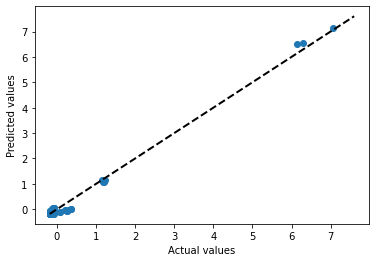

In [32]:
# Create scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score
# Creating a DecisionTreeRegressor object and fitting the model
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, y_train)

# Making predictions
y_pred = dtr.predict(X_test)

# Calculating the mean squared error of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print("R-squared:", r2)

Mean Squared Error: 0.006081902901334561
R-squared: 0.9924368134478341


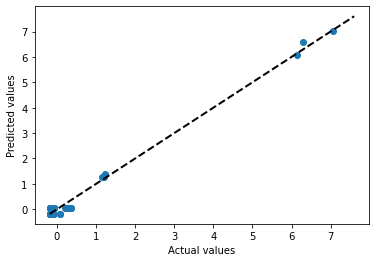

In [34]:
# Create scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

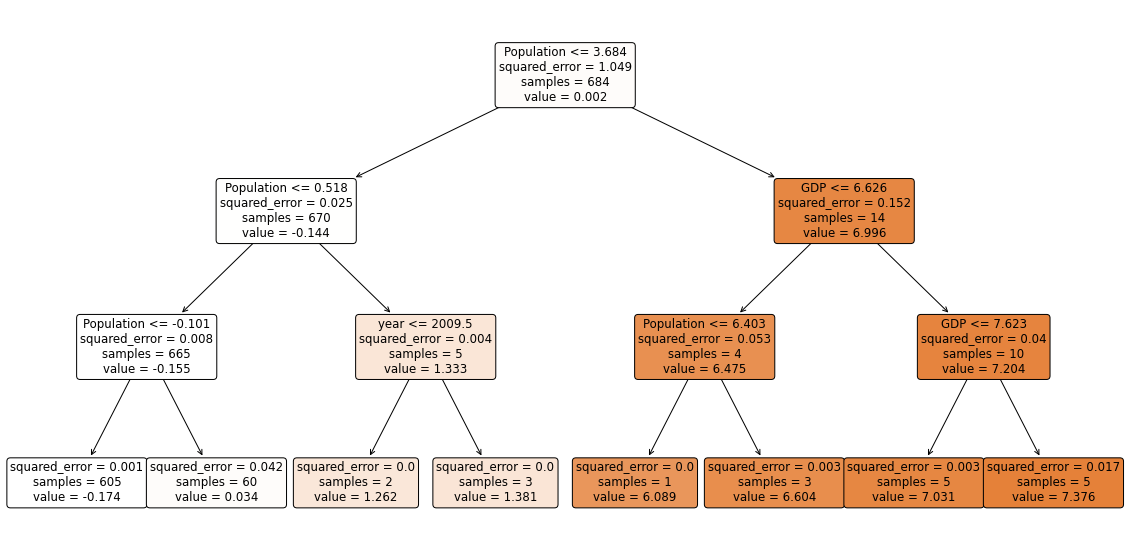

In [35]:
from sklearn.tree import plot_tree

# plot decision tree
plt.figure(figsize=(20,10))  # set figure size
plot_tree(dtr, filled=True, rounded=True, feature_names=X.columns)
plt.show()


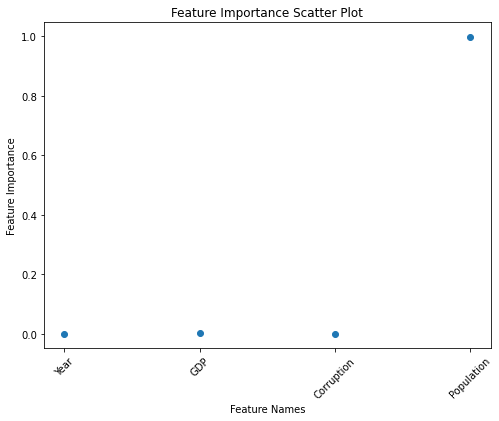

In [36]:
# Get feature importances
importances = dtr.feature_importances_

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(feature_names, rotation=45)
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Feature Names')
plt.title('Feature Importance Scatter Plot')
plt.show()

In [37]:
# Create a Random Forest Regressor model with 100 trees
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r_squared)

Mean squared error: 0.0015389564491364066
R-squared: 0.9939357834088958


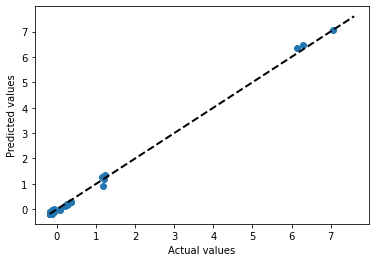

In [38]:
# Create scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

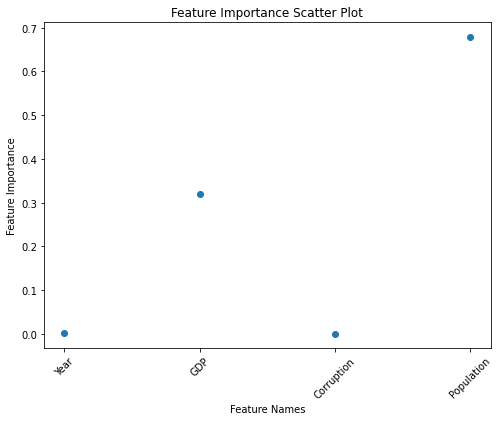

In [39]:
# Get feature importances
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor


# Get feature importances
importances = rf.feature_importances_

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(feature_names, rotation=45)
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Feature Names')
plt.title('Feature Importance Scatter Plot')
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
k = 2# number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R-squared:", r2)

MSE: 0.024573378961952507
R-squared: 0.9694416283322224


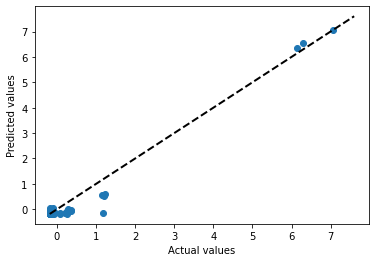

In [41]:
# Create scatter plot
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

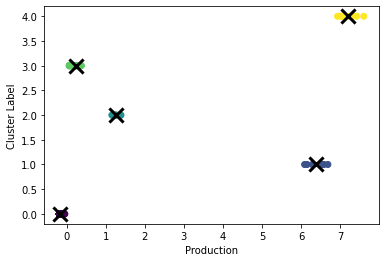

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the 'score' column from the employ dataset
X = df[['production']].values

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.scatter(X[:, 0], labels, c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], [0, 1, 2, 3,4], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('Production')
plt.ylabel('Cluster Label')
plt.show()

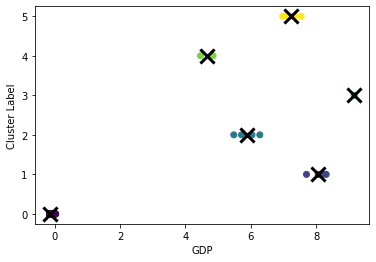

In [69]:
# Extract the 'score' column from the employ dataset
X = df[['GDP']].values

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=6)

# Fit the model to the data
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.scatter(X[:, 0], labels, c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], [0, 1, 2, 3,4,5], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('GDP')
plt.ylabel('Cluster Label')
plt.show()

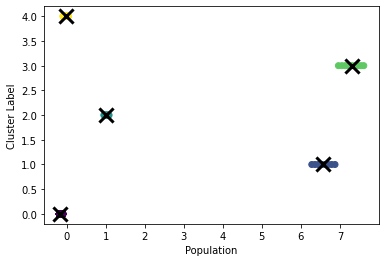

In [70]:
# Extract the 'score' column from the employ dataset
X = df[['Population']].values

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.scatter(X[:, 0], labels, c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], [0, 1, 2, 3,4], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('Population')
plt.ylabel('Cluster Label')
plt.show()

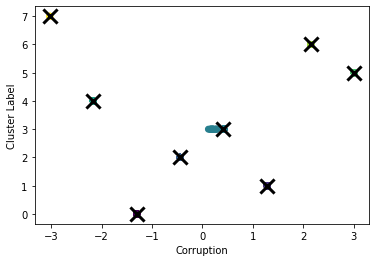

In [71]:
# Extract the 'score' column from the employ dataset
X = df[['Corruption']].values

# Create a KMeans object with the desired number of clusters
kmeans = KMeans(n_clusters=8)

# Fit the model to the data
kmeans.fit(X)

# Get the predicted cluster labels for each data point
labels = kmeans.labels_

# Get the coordinates of the cluster centroids
centroids = kmeans.cluster_centers_

# Plot the clusters and centroids
plt.scatter(X[:, 0], labels, c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], [0, 1, 2, 3,4,5,6,7], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('Corruption')
plt.ylabel('Cluster Label')
plt.show()

In [46]:
import scipy.stats as stats
# perform Shapiro-Wilk normality test on all columns
for col in df.columns:
    stat, p = stats.shapiro(df[col])
    print('Shapiro-Wilk test statistic for', col, ':', stat)
    print('p-value for', col, ':', p)

Shapiro-Wilk test statistic for year : 0.9491410255432129
p-value for year : 1.3579923377956562e-16
Shapiro-Wilk test statistic for GDP : 0.1252669095993042
p-value for GDP : 0.0
Shapiro-Wilk test statistic for Corruption : 0.9273200631141663
p-value for Corruption : 6.301597615748212e-20
Shapiro-Wilk test statistic for Population : 0.1575230360031128
p-value for Population : 0.0
Shapiro-Wilk test statistic for production : 0.17259281873703003
p-value for production : 0.0


In [47]:
df.tail()

,year,GDP,Corruption,Population,production
8833,2021,-0.141271,-0.441022,-0.136811,-0.182288
8837,2021,-0.138503,0.421461,-0.148407,-0.181982
8839,2021,9.161527,0.193861,7.608937,7.602730
8841,2021,-0.143044,-0.441022,-0.162796,-0.184636
8842,2021,-0.142444,-0.441022,-0.166224,-0.185259


In [48]:
df.head()

,year,GDP,Corruption,Population,production
6158,2005,-0.141614,-0.441022,-0.162818,-0.185202
6159,2005,-0.144403,0.421461,-0.178991,-0.185288
6162,2005,-0.144706,-0.441022,-0.178976,-0.185288
6166,2005,-0.143902,-0.441022,-0.173451,-0.185206
6167,2005,-0.145071,0.421461,-0.174700,-0.184616


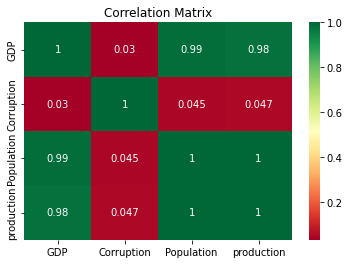

In [49]:
# create correlation matrix
corr_matrix = df.corr()

# plot heatmap
sea.heatmap(corr_matrix, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix')
plt.show()

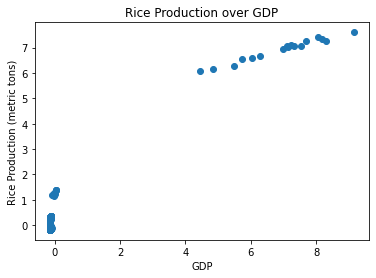

In [50]:
# create scatter plot
plt.scatter(df['GDP'], df['production'])
plt.title('Rice Production over GDP')
plt.xlabel('GDP')
plt.ylabel('Rice Production (metric tons)')
plt.show()

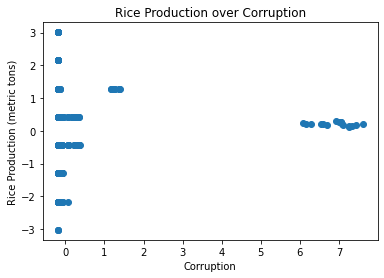

In [51]:
# create scatter plot
plt.scatter(df['production'], df['Corruption'])
plt.title('Rice Production over Corruption')
plt.xlabel('Corruption')
plt.ylabel('Rice Production (metric tons)')
plt.show()

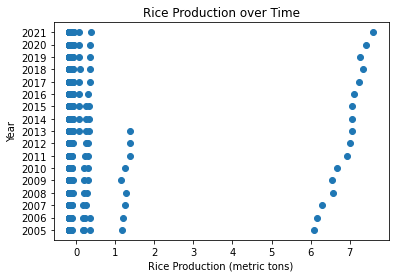

In [52]:
# create scatter plot
plt.scatter(df['production'], df['year'])
plt.title('Rice Production over Time')
plt.xlabel('Rice Production (metric tons)')
plt.ylabel('Year')
plt.show()

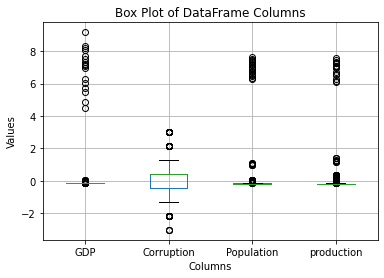

In [53]:
# create box plot
df.boxplot()

# set plot title and axis labels
plt.title('Box Plot of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')

# show plot
plt.show()

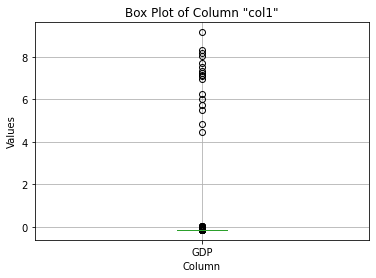

In [54]:
# create box plot of col1
df.boxplot(column='GDP')

# set plot title and axis labels
plt.title('Box Plot of Column "col1"')
plt.xlabel('Column')
plt.ylabel('Values')

# show plot
plt.show()

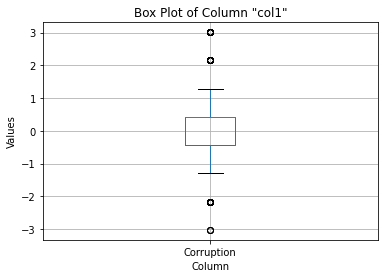

In [55]:
# create box plot of col1
df.boxplot(column='Corruption')

# set plot title and axis labels
plt.title('Box Plot of Column "col1"')
plt.xlabel('Column')
plt.ylabel('Values')

# show plot
plt.show()

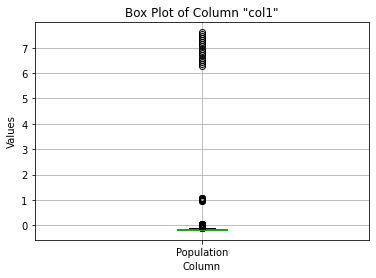

In [56]:
# create box plot of col1
df.boxplot(column='Population')

# set plot title and axis labels
plt.title('Box Plot of Column "col1"')
plt.xlabel('Column')
plt.ylabel('Values')

# show plot
plt.show()

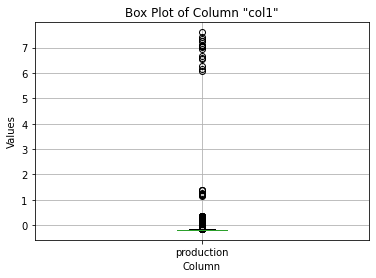

In [57]:
# create box plot of col1
df.boxplot(column='production')

# set plot title and axis labels
plt.title('Box Plot of Column "col1"')
plt.xlabel('Column')
plt.ylabel('Values')

# show plot
plt.show()

In [58]:
# calculate summary statistics
summary = df.describe()

# print summary statistics
print(summary)

                GDP    Corruption    Population    production
count  8.560000e+02  8.560000e+02  8.560000e+02  8.560000e+02
mean  -1.212685e-17  5.800137e-16  2.315126e-17  1.867665e-17
std    1.000585e+00  1.000585e+00  1.000585e+00  1.000585e+00
min   -1.451256e-01 -3.028470e+00 -1.815028e-01 -1.852878e-01
25%   -1.445626e-01 -4.410221e-01 -1.744322e-01 -1.846230e-01
50%   -1.439033e-01  4.214606e-01 -1.676131e-01 -1.832727e-01
75%   -1.419493e-01  4.214606e-01 -1.538826e-01 -1.715675e-01
max    9.161527e+00  3.008908e+00  7.608937e+00  7.602730e+00


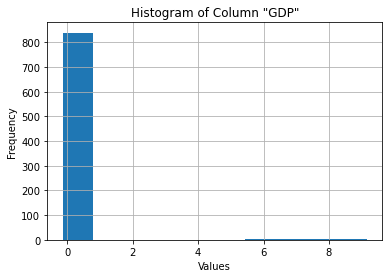

In [59]:
# create histogram of col1
df['GDP'].hist()

# set plot title and axis labels
plt.title('Histogram of Column "GDP"')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show plot
plt.show()

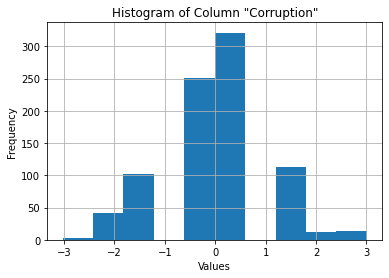

In [60]:
# create histogram of col1
df['Corruption'].hist()

# set plot title and axis labels
plt.title('Histogram of Column "Corruption"')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show plot
plt.show()

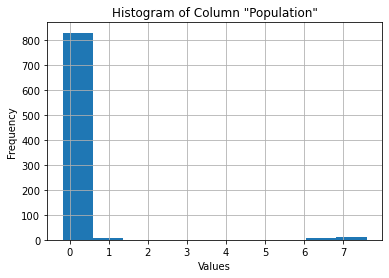

In [61]:
# create histogram of col1
df['Population'].hist()

# set plot title and axis labels
plt.title('Histogram of Column "Population"')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show plot
plt.show()

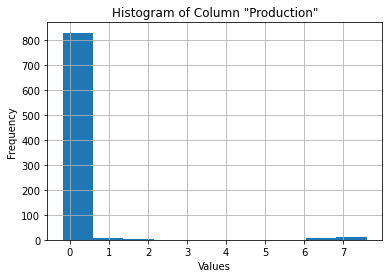

In [62]:
# create histogram of col1
df['production'].hist()

# set plot title and axis labels
plt.title('Histogram of Column "Production"')
plt.xlabel('Values')
plt.ylabel('Frequency')

# show plot
plt.show()

In [78]:
df2 = df2.dropna()
# Selecting the columns to be scaled
columns_to_scale = ['GDP','Corruption','production']

# Creating a StandardScaler object
scaler = StandardScaler()

# Scaling the selected columns
df2[columns_to_scale] = scaler.fit_transform(df2[columns_to_scale])

In [79]:
X = df2.drop('production', axis=1)
y = df2['production']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [80]:
# Fit logistic regression model

model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Predict binary score using test set
y_pred = model.predict(X_test)
# Access the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Print the coefficients and intercept
print("Intercept:", intercept)
for i in range(len(X.columns)):
    print(X.columns[i], coefficients[i])

# Access the R-squared value
r_squared = model.score(X, y)
print("R-squared:", r_squared)
r2 = r2_score(y_test, y_pred)
print('R-squared: ',r2)
mse = mean_squared_error(y_test, y_pred)
print("MSE: " , mse)

Intercept: -0.0060456291839449
GDP 0.9635434476420348
Corruption 0.012829384368447464
R-squared: 0.9621598964173212
R-squared:  0.9240397248133755
MSE:  0.06108311818798147


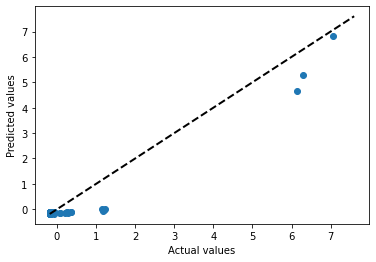

In [81]:
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [82]:
rf = RandomForestRegressor(n_estimators=100, random_state=2)

# Train the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("R-squared:", r_squared)

Mean squared error: 0.014672232417350358
R-squared: 0.9621598964173212


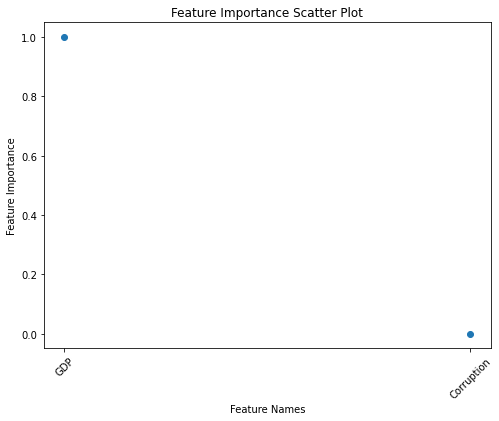

In [83]:
# Get feature importances
importances = rf.feature_importances_

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(range(len(importances)), importances)
ax.set_xticks(range(len(importances)))
ax.set_xticklabels(['GDP','Corruption'], rotation=45)
ax.set_ylabel('Feature Importance')
ax.set_xlabel('Feature Names')
plt.title('Feature Importance Scatter Plot')
plt.show()

In [84]:
# Creating a DecisionTreeRegressor object and fitting the model
dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, y_train)

# Making predictions
y_pred = dtr.predict(X_test)

# Calculating the mean squared error of the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
print("R-squared:", r2)

Mean Squared Error: 0.014137174834119201
R-squared: 0.9824196320912051


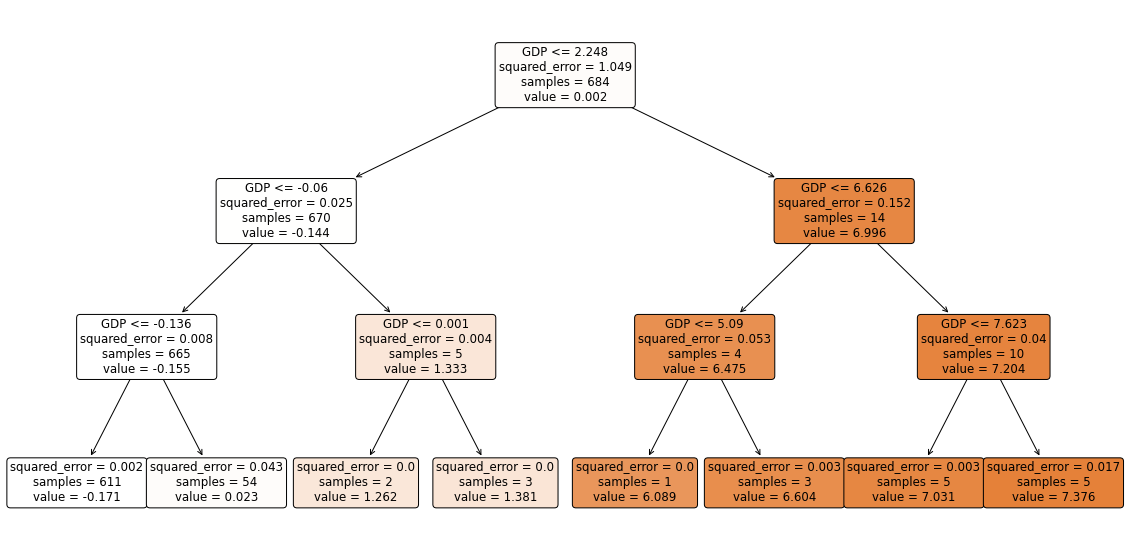

In [85]:
from sklearn.tree import plot_tree

# plot decision tree
plt.figure(figsize=(20,10))  # set figure size
plot_tree(dtr, filled=True, rounded=True, feature_names=X.columns)
plt.show()